# 2022년 4월 1일부터 100일간 평점이 높았던 영화 1~5위 

In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
from tqdm import tqdm
from bs4 import BeautifulSoup

In [2]:
# 2022년 4월 1일 부터 100개를 생성 freq='D'는 일자 기준
date = pd.date_range('2022-4-1', periods=100, freq='D')
date

DatetimeIndex(['2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
               '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12',
               '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16',
               '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-04-30', '2022-05-01', '2022-05-02',
               '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06',
               '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10',
               '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-14',
               '2022-05-15', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20', '2022-05-21', '2022-05-22',
               '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
      

In [3]:
movie_date = []
movie_name = []
movie_point = []

for today in tqdm(date):
    html = 'https://movie.naver.com' + '/movie/sdb/rank/rmovie.naver?sel=cur&date=' + today.strftime('%Y%m%d')
    response = urlopen(html)
    soup = BeautifulSoup(response, 'html.parser')
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for _ in range(0, end)])
    movie_name.extend([soup.find_all('div','tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td','point')[n].string for n in range(0, end)])    

100%|██████████| 100/100 [00:33<00:00,  3.02it/s]


In [4]:
print(len(movie_date), len(movie_name), len(movie_point))

3947 3947 3947


In [5]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
movie.head()

,date,name,point
0,2022-04-01,씽2게더,9.41
1,2022-04-01,패왕별희 디 오리지널,9.31
2,2022-04-01,극장판 주술회전 0,9.27
3,2022-04-01,해피 투게더,9.19
4,2022-04-01,코다,9.16


In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3947 entries, 0 to 3946
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3947 non-null   datetime64[ns]
 1   name    3947 non-null   object        
 2   point   3947 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 92.6+ KB


In [7]:
movie['point'] = movie['point'].astype('float')

In [8]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3947 entries, 0 to 3946
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3947 non-null   datetime64[ns]
 1   name    3947 non-null   object        
 2   point   3947 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 92.6+ KB


In [9]:
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum) #영화별 평점 합산
movie_best = movie_unique.sort_values(by='point', ascending=False) # 합산된 평점을 내림차순 정렬
movie_best.head()

,point
name,
극장판 주술회전 0,925.38
코다,913.57
드라이브 마이 카,783.20
중경삼림,720.93
씽2게더,704.49


In [10]:
movie_best.reset_index()['name'][:5]

0    극장판 주술회전 0
1            코다
2     드라이브 마이 카
3          중경삼림
4          씽2게더
Name: name, dtype: object

# 날짜별 평점 변화를 그래프로 그려보세요.

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
# notebook 표기
%matplotlib inline

import platform

# - 깨짐 방지
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 깨짐 방지
if( platform.system() =='Darwin' ):
    rc( 'font', family='AppleGothic' )
elif( platform.system() == 'Windows' ):
    path='c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties( fname=path ).get_name()
    rc('font',family=font_name)
else: 
    print('error')

In [12]:
movie_top5_col = [x for x in movie_best.reset_index()['name'][:5]]
movie_top5_col

['극장판 주술회전 0', '코다', '드라이브 마이 카', '중경삼림', '씽2게더']

In [13]:
movie_top5 = movie[movie['name'].str.contains('|'.join(movie_top5_col))]
movie_top5

,date,name,point
0,2022-04-01,씽2게더,9.41
2,2022-04-01,극장판 주술회전 0,9.27
4,2022-04-01,코다,9.16
13,2022-04-01,드라이브 마이 카,8.44
30,2022-04-02,씽2게더,9.41
...,...,...,...
3896,2022-07-08,드라이브 마이 카,8.41
3917,2022-07-09,극장판 주술회전 0,9.24
3918,2022-07-09,코다,9.12
3923,2022-07-09,중경삼림,8.90


In [14]:
movie_top5_pivot = pd.pivot_table(movie_top5, index=['date'], columns=['name'], values=['point'])
movie_top5_pivot

point                           
name       극장판 주술회전 0 드라이브 마이 카  씽2게더 중경삼림    코다
date                                            
2022-04-01       9.27      8.44  9.41  NaN  9.16
2022-04-02       9.27      8.44  9.41  NaN  9.15
2022-04-03       9.27      8.44  9.41  NaN  9.15
2022-04-04       9.26      8.43  9.41  NaN  9.15
2022-04-05       9.25      8.44  9.41  NaN  9.15
...               ...       ...   ...  ...   ...
2022-07-05       9.24      8.40   NaN  8.9  9.13
2022-07-06       9.24      8.40   NaN  8.9  9.13
2022-07-07       9.25      8.40   NaN  8.9  9.13
2022-07-08       9.25      8.41   NaN  8.9  9.12
2022-07-09       9.24      8.41   NaN  8.9  9.12

[100 rows x 5 columns]

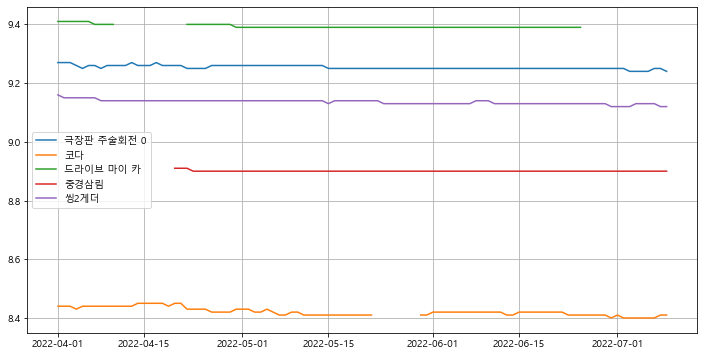

In [15]:
plt.figure(figsize=(12,6))
plt.plot(movie_top5_pivot)
plt.legend(movie_top5_col)
plt.grid()
plt.show()

## 2차 테스트

In [25]:
movie_temp = movie[movie['name'].str.contains('|'.join(movie_top5_col))]
movie_temp.head()

,date,name,point
0,2022-04-01,씽2게더,9.41
2,2022-04-01,극장판 주술회전 0,9.27
4,2022-04-01,코다,9.16
13,2022-04-01,드라이브 마이 카,8.44
30,2022-04-02,씽2게더,9.41


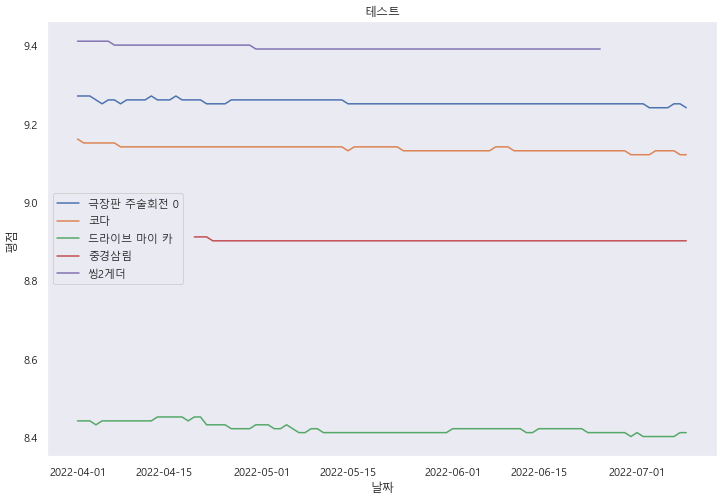

In [44]:
plt.figure(figsize=(12,8))

for x in movie_top5_col:
    tmp = movie_temp[movie_temp['name']==x]
    plt.plot(tmp['date'], tmp['point'])
    
plt.title('테스트')
plt.xlabel('날짜')
plt.ylabel('평점')
plt.legend(movie_top5_col)
plt.grid()
plt.show()